# **Simulated Annealing**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt

# Simulated Annealing

In [6]:
def f(x):
    """
    Function to be minimised or maximised
    note: this can be replaced by any function
    """
    N = 5
    aa = np.random.rand(N)
    bb = np.random.rand(N)
    x_min, x_max = .05, .4
    if (x<x_min) or (x>x_max):
        fx = 0.
    else:
        fx = 0.
        for i in range(N):
            fx += np.cos(1./(aa[i]*x))*np.sin(1/x)
    return fx

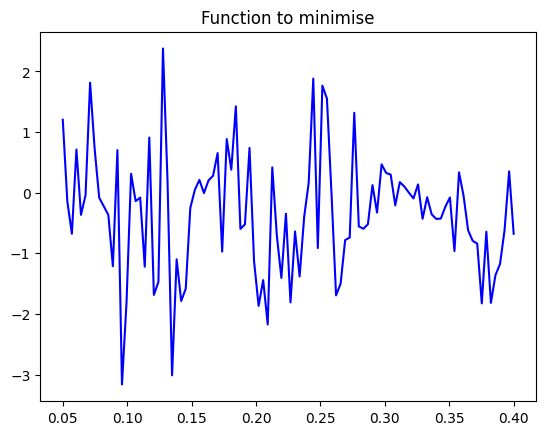

In [7]:
xx = np.linspace(x_min, x_max, 100)
fxx = [f(x) for x in xx]
plt.plot(xx, fxx, 'b')
plt.title("Function to minimise")
plt.show()

The function above is plotted along a finite discrete grid, so we can look for the minimum and maximum directly (for comparison)

In [8]:
x_star_min = xx[np.argmin(fxx)]
x_star_max = xx[np.argmax(fxx)]
print("Minimum attained at ", np.round(x_star_min, 3), "with value", np.round(f(x_star_min), 3))
print("Maximum attained at ", np.round(x_star_max, 3), "with value", np.round(f(x_star_max), 3))

Minimum attained at  0.096 with value 0.406
Maximum attained at  0.128 with value -0.676


In [9]:
def derivf(x, epsilon):
    """
    Finite-difference approximation of the derivative of the function
    x: value at which it is computed
    epsilon: bump amplitude
    """
    return (f(x + epsilon) - f(x - epsilon))/(2.*epsilon)

In [13]:
epsilon = 1E-4
eta = 0.1

def simul_annealing(x0, temperature, x_min, x_max):
    x_simul = [x0]
    probas = [0.]
    outcomes = [0]
    
    if f(x0) == 0.:
        x0 = (x_min + x_max)/2.
        
    for T in temperature:
            
        fx0 = f(x0)
        
        fx1 = 0.
        while fx1 ==0.:
            x1 = x0 + .5*(2*np.random.rand() - 1.) ## how big the jumps should be
            #x1 = x0 + eta * derivf(x, tol)
            fx1 = f(x1)
        
        
        if fx1 < fx0:
            x0 = x1
            outcomes.append(0)
            probas.append(0.)
        else:
            proba_swap = np.exp(-(fx1 - fx0)/T)
            random_proba = np.random.rand()
            if random_proba < proba_swap:
                x0 = x1
                outcomes.append(2)
                probas.append(proba_swap)
            else:
                outcomes.append(1)
                probas.append(0.)
        x_simul.append(x0)
    return x_simul, outcomes, probas

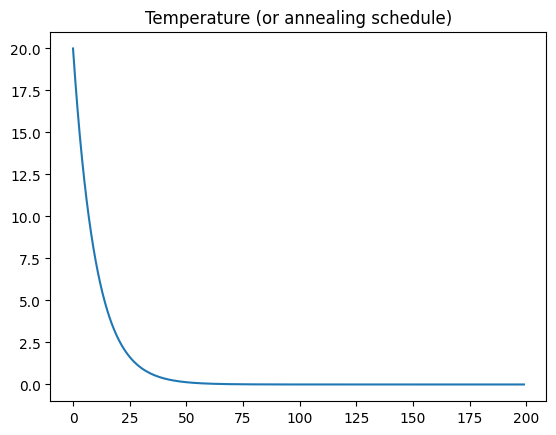

In [14]:
## Specify an annealing schedule
temperature = 20.*np.exp(-np.arange(200)/10)
plt.plot(temperature)
plt.title("Temperature (or annealing schedule)")
plt.show()

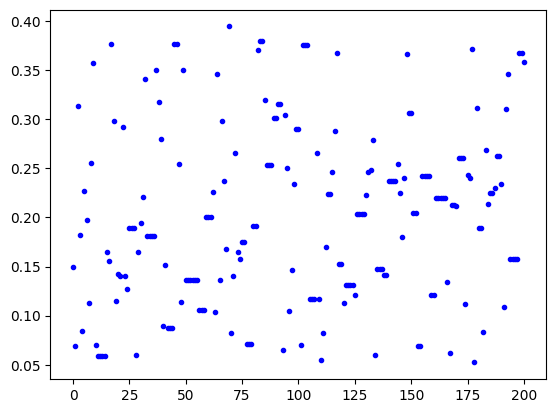

Minimum attained:  0.3588001619908514


In [15]:
x0 = .15
x_simul, outcomes, probas = simul_annealing(x0, temperature, x_min, x_max)
plt.plot(range(len(x_simul)), x_simul, 'b.')
plt.show()
print("Minimum attained: ", x_simul[-1])

In [16]:
from IPython.display import clear_output 
fxx = [f(x) for x in xx]

fx_simul = [f(x) for x in x_simul]
fx_star_max = f(x_star_max)
fx_star_min = f(x_star_min)
size_range = np.abs(fx_star_max - fx_star_min)

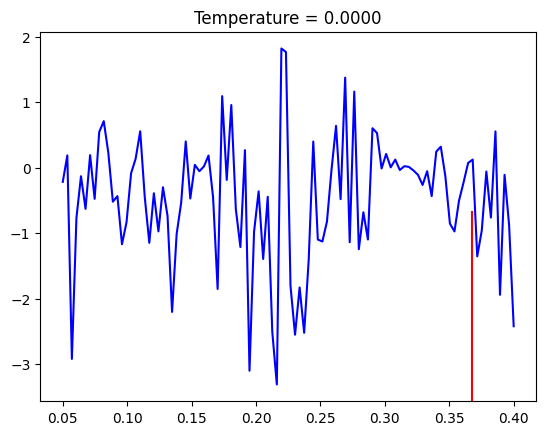

In [17]:
for i in range(len(x_simul)-1):
    x, fx = x_simul[i], fx_simul[i]
    clear_output(wait=True)
    plt.title("Temperature = %.4f" %temperature[i])
    i += 1
    plt.plot(xx, fxx, 'b')
    ymaxperc = .01 + np.abs(fx-fx_star_min) / size_range
    plt.axvline(x=x, ymin=0., ymax=ymaxperc, color='r')
    plt.show()